# Connecting to MongoDB

In [1]:
import pymongo
from pymongo import MongoClient
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Local host
cluster = MongoClient("mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass&directConnection=true&ssl=false")

In [3]:
# Connect to database2
db = cluster["database2"]

In [4]:
# Work with Amazon collection
collection = db["Amazon"]

In [5]:
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, readpreference='primary', appname='MongoDB Compass', directconnection=True, ssl=False), 'database2'), 'Amazon')

In [6]:
# Assign dataframe to all the data in Amazon collection
import pandas as pd
df = pd.DataFrame(collection.find(no_cursor_timeout=True))

# Data Exploratory and Data Preprocessing

In [7]:
df.head()

,_id,,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,60eca3c94d530690eb41d84a,0,5,4,True,"11 6, 2013",A3U4E9PIZ8OWH1,449819906,{'Format:': ' Kindle Edition'},Shirley Curtis,I've read this book already and I've got plans...,A WONDERFUL BOOK,1383696000,
1,60eca3c94d530690eb41d84b,7,5,,True,"11 29, 2016",A1IQJ7PGO9I4MI,449819906,{'Format:': ' Kindle Edition'},GPS,"This book is a most have, if you are serious a...",Magnificent,1480377600,
2,60eca3c94d530690eb41d84c,6,5,,True,"12 23, 2016",A1GJKG5OAQQ69,449819906,{'Format:': ' Kindle Edition'},Kindle Customer,The best knitting instruction book I own in m...,Thank you for the best knitting book I have i...,1482451200,
3,60eca3c94d530690eb41d84d,4,5,,True,"01 12, 2017",A2846L8Q507JC4,449819906,{'Format:': ' Kindle Edition'},Dulce,"A gazillion pattern stitches, lucidly explaine...","Extremely clear, thorough",1484179200,
4,60eca3c94d530690eb41d84e,5,2,,True,"01 6, 2017",A3V21ZT37Y242L,449819906,{'Format:': ' Kindle Edition'},Sheila Fenchak,Just ok. Read better knit books.,Just ok,1483660800,


In [8]:
# Checking how many rows and columns
df.shape

(2875917, 14)

In [9]:
# Checking if we can use overall as the target variable
df.overall.value_counts()

5    1984651
4     361840
1     210232
3     198200
2     120994
Name: overall, dtype: int64

In [10]:
# Change 1-2 to negative, 3 to neutral, and 4-5 to positive for overall column
df.overall.mask(df.overall == 1, "negative", inplace = True)
df.overall.mask(df.overall == 2, "negative", inplace = True)
df.overall.mask(df.overall == 3, "neutral", inplace = True)
df.overall.mask(df.overall == 4, "positive", inplace = True)
df.overall.mask(df.overall == 5, "positive", inplace = True)
df.head()

,_id,,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,60eca3c94d530690eb41d84a,0,positive,4,True,"11 6, 2013",A3U4E9PIZ8OWH1,449819906,{'Format:': ' Kindle Edition'},Shirley Curtis,I've read this book already and I've got plans...,A WONDERFUL BOOK,1383696000,
1,60eca3c94d530690eb41d84b,7,positive,,True,"11 29, 2016",A1IQJ7PGO9I4MI,449819906,{'Format:': ' Kindle Edition'},GPS,"This book is a most have, if you are serious a...",Magnificent,1480377600,
2,60eca3c94d530690eb41d84c,6,positive,,True,"12 23, 2016",A1GJKG5OAQQ69,449819906,{'Format:': ' Kindle Edition'},Kindle Customer,The best knitting instruction book I own in m...,Thank you for the best knitting book I have i...,1482451200,
3,60eca3c94d530690eb41d84d,4,positive,,True,"01 12, 2017",A2846L8Q507JC4,449819906,{'Format:': ' Kindle Edition'},Dulce,"A gazillion pattern stitches, lucidly explaine...","Extremely clear, thorough",1484179200,
4,60eca3c94d530690eb41d84e,5,negative,,True,"01 6, 2017",A3V21ZT37Y242L,449819906,{'Format:': ' Kindle Edition'},Sheila Fenchak,Just ok. Read better knit books.,Just ok,1483660800,


In [11]:
# Make a copy for testing later
temp = df.copy()

In [12]:
# Check if there's any nulls
df.isnull().sum()

_id                 0
                    0
overall             0
vote                0
verified            0
reviewTime          0
reviewerID          0
asin                0
style               0
reviewerName      326
reviewText          0
summary             0
unixReviewTime      0
image               0
dtype: int64

In [13]:
# Checking how many reviews are in each item
df.asin.value_counts()

B004AKS59O    4534
B0014DGXU8    4006
B000Y00DDK    3862
B00172XBQA    3860
B00122CN64    3772
              ... 
B016PHU4WA       1
B00D0FJUGM       1
B0157JSGPE       1
B012VZ4534       1
B00OTKQCYK       1
Name: asin, Length: 302809, dtype: int64

In [14]:
# Removing rows that have only 100 value count in their asin since we have more than 2 mil rows
df = df.groupby('asin').filter(lambda x : len(x) > 100)
df.asin.value_counts()

B004AKS59O    4534
B0014DGXU8    4006
B000Y00DDK    3862
B00172XBQA    3860
B00122CN64    3772
              ... 
B0092RKJNU     101
B00FR07HP4     101
B004L0AIDE     101
B007JL37I0     101
B00JU6OO5M     101
Name: asin, Length: 4544, dtype: int64

In [15]:
# Checking the length and still have over a million of rows
len(df)

1282703

In [16]:
df.head()

,_id,,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
242,60eca3c94d530690eb41d93c,242,positive,44,True,"06 26, 2007",A2YJ0QZF5CQ2X4,823013626,{'Format:': ' Paperback'},Cindy,"I've loved Donna Kato's work for some time, bu...",Wow! What a resource!,1182816000,
243,60eca3c94d530690eb41d93d,243,positive,,True,"08 16, 2015",A3K068L50RQXCC,823013626,{'Format:': ' Paperback'},Carol P,Absolutely fantastic book. If I could give it...,Essential reading,1439683200,
244,60eca3c94d530690eb41d93e,244,positive,,True,"07 28, 2015",A2NMB9ID620BHK,823013626,{'Format:': ' Paperback'},Mrs. Eve Smith,Exciting and inspirational! Great information.,Great information.,1438041600,
245,60eca3c94d530690eb41d93f,245,positive,,True,"07 23, 2015",A24GSIBPJNJWEF,823013626,{'Format:': ' Paperback'},William V Harrold,very good,Five Stars,1437609600,
246,60eca3c94d530690eb41d940,246,positive,2,True,"07 3, 2015",A3LAFC1BW6N4N2,823013626,{'Format:': ' Paperback'},Susan L,I just received Donna Kato's Creative Surface ...,Never enough hours in a day for these beautifu...,1435881600,


In [17]:
# Remove rows that verified is FALSE because the reviews are not verified
df = df[df.verified == "True"]
df.shape

(1191326, 14)

In [18]:
# Replacing all blank with NaN values
import numpy as np
df.replace("", np.nan, inplace = True)
df.head()

,_id,,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
242,60eca3c94d530690eb41d93c,242,positive,44,True,"06 26, 2007",A2YJ0QZF5CQ2X4,823013626,{'Format:': ' Paperback'},Cindy,"I've loved Donna Kato's work for some time, bu...",Wow! What a resource!,1182816000,NaN
243,60eca3c94d530690eb41d93d,243,positive,NaN,True,"08 16, 2015",A3K068L50RQXCC,823013626,{'Format:': ' Paperback'},Carol P,Absolutely fantastic book. If I could give it...,Essential reading,1439683200,NaN
244,60eca3c94d530690eb41d93e,244,positive,NaN,True,"07 28, 2015",A2NMB9ID620BHK,823013626,{'Format:': ' Paperback'},Mrs. Eve Smith,Exciting and inspirational! Great information.,Great information.,1438041600,NaN
245,60eca3c94d530690eb41d93f,245,positive,NaN,True,"07 23, 2015",A24GSIBPJNJWEF,823013626,{'Format:': ' Paperback'},William V Harrold,very good,Five Stars,1437609600,NaN
246,60eca3c94d530690eb41d940,246,positive,2,True,"07 3, 2015",A3LAFC1BW6N4N2,823013626,{'Format:': ' Paperback'},Susan L,I just received Donna Kato's Creative Surface ...,Never enough hours in a day for these beautifu...,1435881600,NaN


In [19]:
# Checking for na values again
df.isnull().sum()

_id                     0
                        0
overall                 0
vote              1051047
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              491364
reviewerName          213
reviewText            977
summary               367
unixReviewTime          0
image             1160148
dtype: int64

In [20]:
# Choosing only overall and review text column
df = df[["overall", "reviewText"]]
df.head()

,overall,reviewText
242,positive,"I've loved Donna Kato's work for some time, bu..."
243,positive,Absolutely fantastic book. If I could give it...
244,positive,Exciting and inspirational! Great information.
245,positive,very good
246,positive,I just received Donna Kato's Creative Surface ...


In [21]:
# Checking if there's any nulls still
df.isnull().sum()

overall         0
reviewText    977
dtype: int64

In [22]:
# Dropping the rows with NA values since reviewText is an important variable
df.dropna(inplace = True)
df.isnull().sum()

overall       0
reviewText    0
dtype: int64

In [23]:
# Checking the shape of dataframe
df.shape

(1190349, 2)

In [24]:
# Creating length of words column
df["length"] = df["reviewText"].str.split().str.len()

In [25]:
# Checking why there's null values in the length
row_has_NaN = df.isnull().any(axis=1)
df[row_has_NaN]
# It seems like the length of NaN means that the reviews aren't words

,overall,reviewText,length
50582,positive,1,NaN
50737,positive,1,NaN
108437,positive,1,NaN
125948,positive,1,NaN
128244,positive,1,NaN
...,...,...,...
1685641,positive,1,NaN
1872640,positive,1,NaN
1968848,positive,1,NaN
1986641,positive,1,NaN


In [26]:
# Because those reviews are not text, will get rid of those rows so we could turn the length column into integer
df.dropna(inplace = True)
df.isnull().sum()

overall       0
reviewText    0
length        0
dtype: int64

In [27]:
# Change to integer
df.length = df.length.astype("int")

In [28]:
# Create number of punc column
import string
count = lambda l1, l2: sum([1 for x in l1 if x in l2])

df["punct"] = df.reviewText.apply(lambda y: count(y, string.punctuation))
df.head()

,overall,reviewText,length,punct
242,positive,"I've loved Donna Kato's work for some time, bu...",110,26
243,positive,Absolutely fantastic book. If I could give it...,12,3
244,positive,Exciting and inspirational! Great information.,5,2
245,positive,very good,2,0
246,positive,I just received Donna Kato's Creative Surface ...,121,12


In [29]:
# check for space i.e. any blank message
blanks = []

for idx, label, review, length, punct in df.itertuples():
    if review.isspace():
        blanks.append(i)
blanks

# Since there isn't any blank messages, we can continue to the next step

[]

In [30]:
# Remove HTML code artifacts
from bs4 import BeautifulSoup

df['reviewText'] = [BeautifulSoup(text).get_text() for text in df['reviewText']]
df.head()

,overall,reviewText,length,punct
242,positive,"I've loved Donna Kato's work for some time, bu...",110,26
243,positive,Absolutely fantastic book. If I could give it...,12,3
244,positive,Exciting and inspirational! Great information.,5,2
245,positive,very good,2,0
246,positive,I just received Donna Kato's Creative Surface ...,121,12


In [31]:
# Create a copy to see if it's better without the preprocessing
temp2 = df.copy()

In [32]:
# Remove non letters
df['reviewText'] = df.reviewText.str.replace('[^a-zA-Z]', ' ')
df.head()

,overall,reviewText,length,punct
242,positive,I ve loved Donna Kato s work for some time bu...,110,26
243,positive,Absolutely fantastic book If I could give it...,12,3
244,positive,Exciting and inspirational Great information,5,2
245,positive,very good,2,0
246,positive,I just received Donna Kato s Creative Surface ...,121,12


In [33]:
# Remove punctuations from the reviews
df["reviewText"] = df['reviewText'].str.replace('[^\w\s]','')
df.head()

,overall,reviewText,length,punct
242,positive,I ve loved Donna Kato s work for some time bu...,110,26
243,positive,Absolutely fantastic book If I could give it...,12,3
244,positive,Exciting and inspirational Great information,5,2
245,positive,very good,2,0
246,positive,I just received Donna Kato s Creative Surface ...,121,12


In [34]:
# Checking what are stop words
from nltk.corpus import stopwords
stop = stopwords.words("english")
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
# Removing stop words
df.reviewText = df.reviewText.apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df.head()

,overall,reviewText,length,punct
242,positive,I loved Donna Kato work time I purchased sever...,110,26
243,positive,Absolutely fantastic book If I could give star...,12,3
244,positive,Exciting inspirational Great information,5,2
245,positive,good,2,0
246,positive,I received Donna Kato Creative Surface effects...,121,12


In [36]:
# Import the stop words csv file that I created from the website
# https://www.ranks.nl/stopwords

stop = pd.read_csv("stop_words.csv", header = None)
stop.head()

,0
0,a
1,able
2,about
3,above
4,abst


In [37]:
# Turn it into a list
stop = [x for x in stop[0]]

# Removing stop words again
df.reviewText = df.reviewText.apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df.head()

,overall,reviewText,length,punct
242,positive,I loved Donna Kato work time I purchased polym...,110,26
243,positive,Absolutely fantastic book If I stars I,12,3
244,positive,Exciting inspirational Great,5,2
245,positive,good,2,0
246,positive,I received Donna Kato Creative Surface effects...,121,12


In [38]:
df.reviewText[242]

'I loved Donna Kato work time I purchased polymer clay books years I working PC Ms Kato books I purchased It I received today read cover cover My hands itching techniques generously painstakingly shares While leading polymer clay artists sell techniques individually seminars expensive DVDs Ms Kato demonstrated processes I hungry learn place beautiful inexpensive written book Hats Donna Kato'

In [39]:
# Making a copy of the data frame so we can test one with lemmatization and one without
# Lemmatizing means to assign the base form of words. This will help turn all the text into its base words so we won't
# duplicate the same words. For example: shop, shopping, shopped
df2 = df.copy()

In [40]:
# Lemmatize the copied dataframe with PorterStemmer
import nltk

lm = nltk.PorterStemmer()

In [41]:
# Create a function for PorterStemmer
def lemmatize_txt(text):
    word_list = nltk.word_tokenize(text)
    
    lm_output = " ".join([lm.stem(x) for x in word_list])
    return lm_output

# Lemmatize the reviews
df2.reviewText = df.reviewText.apply(lemmatize_txt)
df2.head()

,overall,reviewText,length,punct
242,positive,i love donna kato work time i purchas polym cl...,110,26
243,positive,absolut fantast book if i star i,12,3
244,positive,excit inspir great,5,2
245,positive,good,2,0
246,positive,i receiv donna kato creativ surfac effect thi ...,121,12


In [42]:
# Making another copy of the data frame
lm2 = nltk.stem.WordNetLemmatizer()

df3 = df.copy()

# Create a function for WordNetLemmatizer
def lemmatize_txt2(text):
    word_list = nltk.word_tokenize(text)
    
    lm_output = " ".join([lm2.lemmatize(x) for x in word_list])
    return lm_output

# Lemmatize the reviews
df3.reviewText = df3.reviewText.apply(lemmatize_txt2)
df3.head()

,overall,reviewText,length,punct
242,positive,I loved Donna Kato work time I purchased polym...,110,26
243,positive,Absolutely fantastic book If I star I,12,3
244,positive,Exciting inspirational Great,5,2
245,positive,good,2,0
246,positive,I received Donna Kato Creative Surface effect ...,121,12


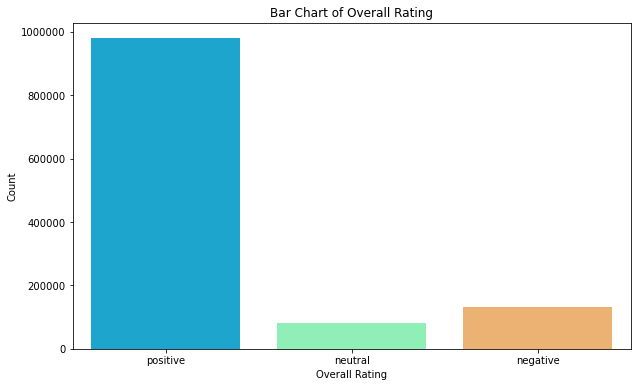

In [43]:
# Time to create graphs with the original dataframe
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 6))
ax.ticklabel_format(useOffset = False, style = "plain")
sns.countplot(df.overall, palette = "rainbow")
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.title("Bar Chart of Overall Rating");

# This bar graph shows that there are more positive reviews than neutral and negative. It also shows that there's definitely an
# imbalance with the overall rating. 

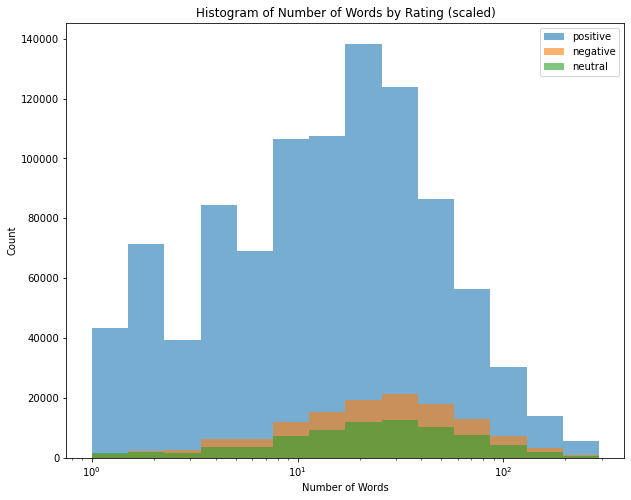

In [44]:
# Creating histogram with the length of words, scaling the x by log so it would respond to skewness towards large values
# (which  one or a few points are much larger than the majority of the data)
plt.figure(figsize = (10,8))
plt.xscale("log")
bins = 1.5 ** (np.arange(0,15))
plt.hist(df[df.overall == "positive"]["length"], bins = bins, alpha = .6)
plt.hist(df[df.overall == "negative"]["length"], bins = bins, alpha = .6)
plt.hist(df[df.overall == "neutral"]["length"], bins = bins, alpha = .6)
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.title("Histogram of Number of Words by Rating (scaled)")
plt.legend(("positive", "negative", "neutral"))
plt.show();

# There's not that much difference between number of words between the ratings

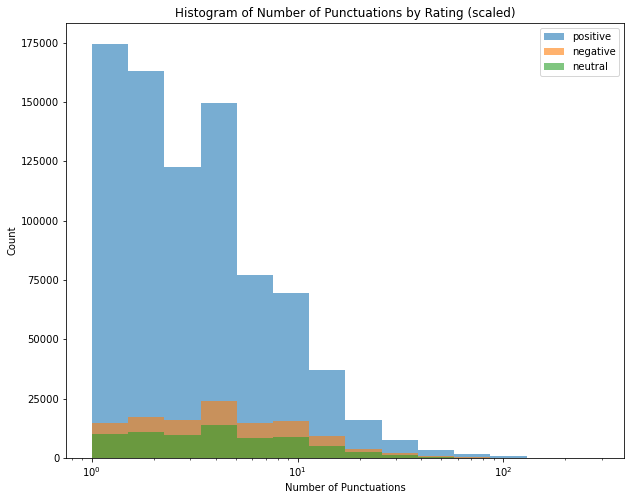

In [45]:
# Creating a graph with number of punctuations, scaling x by log
plt.figure(figsize = (10,8))
plt.xscale("log")
bins = 1.5 ** (np.arange(0,15))
plt.hist(df[df.overall == "positive"]["punct"], bins = bins, alpha = .6)
plt.hist(df[df.overall == "negative"]["punct"], bins = bins, alpha = .6)
plt.hist(df[df.overall == "neutral"]["punct"], bins = bins, alpha = .6)
plt.xlabel("Number of Punctuations")
plt.ylabel("Count")
plt.title("Histogram of Number of Punctuations by Rating (scaled)")
plt.legend(("positive", "negative", "neutral"))
plt.show();

# This histogram shows the positive reviews will have less number of punctuations compared to the neutral and negative reviews

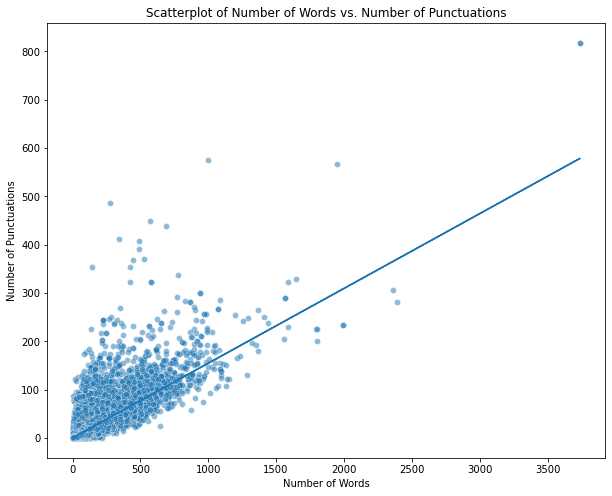

In [46]:
# Getting the scatterplot between the number of words and number of punctuations
plt.figure(figsize = (10, 8))
sns.scatterplot(x = "length", y = "punct", data = df, alpha = .5)
m, b = np.polyfit(df.length, df.punct, 1)
plt.plot(df.length, m * df.length + b)
plt.xlabel("Number of Words")
plt.ylabel("Number of Punctuations")
plt.title("Scatterplot of Number of Words vs. Number of Punctuations");

# As expected, there is a positive correlation between the number of words and number of punctuations. If we are writing a 
# long review with lots of sentences, there will be lots of punctuations

In [47]:
df.overall.value_counts()

positive    979620
negative    130437
neutral      80227
Name: overall, dtype: int64

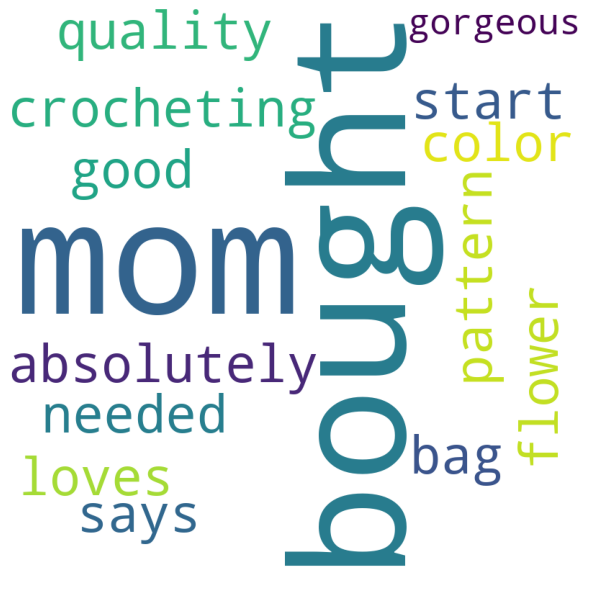

In [48]:
# Word Cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

comment_words = " "
stopwords = set(STOPWORDS)

# iterate through reviews
for val in df.reviewText:
    # Turn each review to string in case if it's not string
    val = str(val)
    
    # split the value
    tokens = val.split()
    
# Converts each token to lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    
for words in tokens:    
    comment_words = comment_words + words + " "
    
wordcloud = WordCloud(width = 800,
                     height = 800,
                     background_color = "white",
                     stopwords = stopwords,
                     min_font_size = 1).generate(comment_words)

# Plot the wordcloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Partition the Data

In [49]:
from sklearn.model_selection import train_test_split
X = temp2.reviewText
y = temp2.overall

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.1, 
                                                    stratify = y, 
                                                    random_state = 42)

In [50]:
# Try this with the preprocessed data
X1 = df.reviewText
y1 = df.overall

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, 
                                                        y1, 
                                                        test_size = 0.1, 
                                                        stratify = y1, 
                                                        random_state = 42)

In [51]:
# Try this with Porter Stemmer data
X2 = df2.reviewText
y2 = df2.overall

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.1, stratify = y2, random_state = 42)

In [52]:
# Try this with Word Net Lemmatizer data
X3 = df3.reviewText
y3 = df3.overall

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.1, stratify = y3, random_state = 42)

# Building Pipeline for both TfidfVectorizer and Classifier

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# Use the pipeline and fit the training data to the model
# Use the temp2 data
# min df = 2 means a word must occur in at least 2 documents from the corpus
# max df = .98 means ignore words that occur in more than 98% of the documents from the corpus
# Try with Linear SVC first
text_svc = Pipeline([("tfidf", TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english")),
                     ("clf", LinearSVC())])

text_svc.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('clf', LinearSVC())])

In [54]:
# Try it with the other data (preprocessed, porter stemmer, and word net stemmer)
text_svc1 = Pipeline([("tfidf", TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english")),
                     ("clf", LinearSVC())])
text_svc2 = Pipeline([("tfidf", TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english")),
                     ("clf", LinearSVC())])
text_svc3 = Pipeline([("tfidf", TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english")),
                     ("clf", LinearSVC())])

text_svc1.fit(X1_train, y1_train)
text_svc2.fit(X2_train, y2_train)
text_svc3.fit(X3_train, y3_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('clf', LinearSVC())])

In [55]:
# Form a prediction set for the temp2 data
pred = text_svc.predict(X_test)

In [56]:
# Predictions with other data
pred1 = text_svc1.predict(X1_test)
pred2 = text_svc1.predict(X2_test)
pred3 = text_svc1.predict(X3_test)

In [57]:
# Check the confusion matrix and the classification reports for temp2
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 8783   264  3997]
 [ 1915   542  5566]
 [ 1436   312 96214]]
              precision    recall  f1-score   support

    negative       0.72      0.67      0.70     13044
     neutral       0.48      0.07      0.12      8023
    positive       0.91      0.98      0.94     97962

    accuracy                           0.89    119029
   macro avg       0.71      0.57      0.59    119029
weighted avg       0.86      0.89      0.86    119029



In [198]:
# Math behind the classification report
# Precision
prec_neg = 8783 / (8783 + 1915 + 1436)
print("Negative precision:", prec_neg)

prec_neu = 542 / (264 + 542 + 312)
print("Neutral precision:", prec_neu)

prec_pos = 96214 / (3997 + 5566 + 96214)
print("Positive precision:", prec_pos)

Negative precision: 0.7238338552826767
Neutral precision: 0.4847942754919499
Positive precision: 0.9095928226363009


In [199]:
# Recall
rec_neg = 8783 / (8783 + 264 + 3997)
print("Negative recall:", rec_neg)

rec_neu = 542 / (1915 + 542 + 5566)
print("Neutral recall:", rec_neu)

rec_pos = 96214 / (1436 + 312 + 96214)
print("Positive recall:", rec_pos)

Negative recall: 0.6733363998773383
Neutral recall: 0.06755577714072043
Positive recall: 0.9821563463383761


In [200]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6976725712923981
Neutral f1-score: 0.11858658790066733
Positive f1-score: 0.9444828923279294


In [61]:
# With other data
print(confusion_matrix(y1_test, pred1))
print(classification_report(y1_test, pred1))

[[ 8338   217  4489]
 [ 1782   417  5824]
 [ 1450   240 96272]]
              precision    recall  f1-score   support

    negative       0.72      0.64      0.68     13044
     neutral       0.48      0.05      0.09      8023
    positive       0.90      0.98      0.94     97962

    accuracy                           0.88    119029
   macro avg       0.70      0.56      0.57    119029
weighted avg       0.85      0.88      0.86    119029



In [62]:
# Math behind the classification report
# Precision
prec_neg = 8338 / (8338 + 1782 + 1450)
print("Negative precision:", prec_neg)

prec_neu = 417 / (217 + 417 + 240)
print("Neutral precision:", prec_neu)

prec_pos = 96272 / (4489 + 5824 + 96272)
print("Positive precision:", prec_pos)

Negative precision: 0.720656871218669
Neutral precision: 0.477116704805492
Positive precision: 0.9032415443073604


In [63]:
# Recall
rec_neg = 8338 / (8338 + 217 + 4489)
print("Negative recall:", rec_neg)

rec_neu = 417 / (1782 + 417 + 5824)
print("Neutral recall:", rec_neu)

rec_pos = 96272 / (1450 + 240 + 96272)
print("Positive recall:", rec_pos)

Negative recall: 0.6392210978227537
Neutral recall: 0.05197557023557273
Positive recall: 0.982748412649803


In [64]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6775006094092793
Neutral f1-score: 0.09373946274024952
Positive f1-score: 0.941319110033391


In [65]:
# Next Porter Stemmer
print(confusion_matrix(y2_test, pred2))
print(classification_report(y2_test, pred2))

[[ 5056   203  7785]
 [ 1263   281  6479]
 [ 1989   385 95588]]
              precision    recall  f1-score   support

    negative       0.61      0.39      0.47     13044
     neutral       0.32      0.04      0.06      8023
    positive       0.87      0.98      0.92     97962

    accuracy                           0.85    119029
   macro avg       0.60      0.47      0.49    119029
weighted avg       0.80      0.85      0.81    119029



In [66]:
# Math behind the classification report
# Precision
prec_neg = 5056 / (5056 + 1263 + 1989)
print("Negative precision:", prec_neg)

prec_neu = 281 / (203 + 281 + 385)
print("Neutral precision:", prec_neu)

prec_pos = 95588 / (7785 + 6479 + 95588)
print("Positive precision:", prec_pos)

Negative precision: 0.6085700529610014
Neutral precision: 0.3233601841196778
Positive precision: 0.8701525689108983


In [67]:
# Recall
rec_neg = 5056 / (5056 + 203 + 7785)
print("Negative recall:", rec_neg)

rec_neu = 281 / (1263 + 281 + 6479)
print("Neutral recall:", rec_neu)

rec_pos = 95588 / (1989 + 385 + 95588)
print("Positive recall:", rec_pos)

Negative recall: 0.3876111622201779
Neutral recall: 0.03502430512277203
Positive recall: 0.9757661133909067


In [68]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.4735856125889847
Neutral f1-score: 0.06320287899235266
Positive f1-score: 0.9199380214999952


In [69]:
# Lastly Word Net Lemmatizer
print(confusion_matrix(y3_test, pred3))
print(classification_report(y3_test, pred3))

[[ 8450   210  4384]
 [ 1943   390  5690]
 [ 1803   257 95902]]
              precision    recall  f1-score   support

    negative       0.69      0.65      0.67     13044
     neutral       0.46      0.05      0.09      8023
    positive       0.90      0.98      0.94     97962

    accuracy                           0.88    119029
   macro avg       0.68      0.56      0.57    119029
weighted avg       0.85      0.88      0.85    119029



In [70]:
# Math behind the classification report
# Precision
prec_neg = 8450 / (8450 + 1943 + 1803)
print("Negative precision:", prec_neg)

prec_neu = 390 / (210 + 390 + 257)
print("Neutral precision:", prec_neu)

prec_pos = 95902 / (4384 + 5690 + 95902)
print("Positive precision:", prec_pos)

Negative precision: 0.692850114791735
Neutral precision: 0.45507584597432904
Positive precision: 0.904940741299917


In [71]:
# Recall
rec_neg = 8450 / (8450 + 210 + 4384)
print("Negative recall:", rec_neg)

rec_neu = 390 / (1943 + 390 + 5690)
print("Neutral recall:", rec_neu)

rec_pos = 95902 / (1803 + 257 + 95902)
print("Positive recall:", rec_pos)

Negative recall: 0.6478074210364919
Neutral recall: 0.04861024554406083
Positive recall: 0.9789714379044936


In [72]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6695721077654517
Neutral f1-score: 0.08783783783783784
Positive f1-score: 0.9405015249732762


# Undersampling

In [73]:
# Using undersampling with the majority class where it under samples the majority class (positive) then fit it to the model
# using LinearSVC
# Do this with df data
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "majority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='majority')),
                ('linearsvc', LinearSVC())])

In [74]:
# Make predictions
y_pred = model.predict(X1_test)

In [75]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[10918  1486   640]
 [ 3330  3299  1394]
 [10696 11195 76071]]


In [76]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.44      0.84      0.57     13044
     neutral       0.21      0.41      0.27      8023
    positive       0.97      0.78      0.86     97962

    accuracy                           0.76    119029
   macro avg       0.54      0.67      0.57    119029
weighted avg       0.86      0.76      0.79    119029



In [77]:
# Math behind the classification report
# Precision
prec_neg = 10918 / (10918 + 3330 + 10696)
print("Negative precision:", prec_neg)

prec_neu = 3299 / (1486 + 3299 + 11195)
print("Neutral precision:", prec_neu)

prec_pos = 76071 / (640 + 1394 + 76071)
print("Positive precision:", prec_pos)

Negative precision: 0.43770044900577293
Neutral precision: 0.20644555694618272
Positive precision: 0.9739581332821202


In [78]:
# Recall
rec_neg = 10918 / (10918 + 1486 + 640)
print("Negative recall:", rec_neg)

rec_neu = 3299 / (3330 + 3299 + 1394)
print("Neutral recall:", rec_neu)

rec_pos = 76071 / (10696 + 11195 + 76071)
print("Positive recall:", rec_pos)

Negative recall: 0.837013186139221
Neutral recall: 0.4111928206406581
Positive recall: 0.7765357995957616


In [79]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.5748130988733284
Neutral f1-score: 0.27488230637836936
Positive f1-score: 0.8641142292422772


In [80]:
# Trying this with sampling strategy of not minority meaning it will resample all classes but the minority class (neutral)
# then fit the model
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [81]:
# Make predictions
y_pred = model.predict(X1_test)

In [82]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9272  2939   833]
 [ 2019  4479  1525]
 [ 5500 15189 77273]]


In [83]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.55      0.71      0.62     13044
     neutral       0.20      0.56      0.29      8023
    positive       0.97      0.79      0.87     97962

    accuracy                           0.76    119029
   macro avg       0.57      0.69      0.59    119029
weighted avg       0.87      0.76      0.80    119029



In [84]:
# Math behind the classification report
# Precision
prec_neg = 9272 / (9272 + 2019 + 5500)
print("Negative precision:", prec_neg)

prec_neu = 4479 / (2939 + 4479 + 15189)
print("Neutral precision:", prec_neu)

prec_pos = 77273 / (833 + 1525 + 77273)
print("Positive precision:", prec_pos)

Negative precision: 0.5522005836460009
Neutral precision: 0.1981244747202194
Positive precision: 0.9703884165714357


In [85]:
# Recall
rec_neg = 9272 / (9272 + 2939 + 833)
print("Negative recall:", rec_neg)

rec_neu = 4479 / (2019 + 4479 + 1525)
print("Neutral recall:", rec_neu)

rec_pos = 77273 / (5500 + 15189 + 77273)
print("Positive recall:", rec_pos)

Negative recall: 0.7108249003373198
Neutral recall: 0.5582699738252525
Positive recall: 0.7888058634980911


In [86]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6215518686106921
Neutral f1-score: 0.292458374142997
Positive f1-score: 0.8702257408794265


In [87]:
# Using Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      MultinomialNB())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('multinomialnb', MultinomialNB())])

In [88]:
# Make predictions
y_pred = model.predict(X1_test)

In [89]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9117  3244   683]
 [ 2039  4690  1294]
 [ 6865 17985 73112]]


In [90]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.51      0.70      0.59     13044
     neutral       0.18      0.58      0.28      8023
    positive       0.97      0.75      0.84     97962

    accuracy                           0.73    119029
   macro avg       0.55      0.68      0.57    119029
weighted avg       0.87      0.73      0.78    119029



In [91]:
# Math behind the classification report
# Precision
prec_neg = 9117 / (9117 + 2039 + 6865)
print("Negative precision:", prec_neg)

prec_neu = 4690 / (3244 + 4690 + 17985)
print("Neutral precision:", prec_neu)

prec_pos = 73112 / (683 + 1294 + 73112)
print("Positive precision:", prec_pos)

Negative precision: 0.5059097719327451
Neutral precision: 0.18094833905629076
Positive precision: 0.9736712434577635


In [92]:
# Recall
rec_neg = 9117 / (9117 + 3244 + 683)
print("Negative recall:", rec_neg)

rec_neu = 4690 / (2039 + 4690 + 1294)
print("Neutral recall:", rec_neu)

rec_pos = 73112 / (6865 + 17985 + 73112)
print("Positive recall:", rec_pos)

Negative recall: 0.6989420423183073
Neutral recall: 0.5845693630811417
Positive recall: 0.7463302096731386


In [93]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.5869628198937711
Neutral f1-score: 0.2763537799776089
Positive f1-score: 0.8449763364557269


In [94]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LogisticRegression())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('logisticregression', LogisticRegression())])

In [95]:
# Make predictions
y_pred = model.predict(X1_test)

In [96]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9332  3034   678]
 [ 1940  4724  1359]
 [ 4673 16686 76603]]


In [97]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.59      0.72      0.64     13044
     neutral       0.19      0.59      0.29      8023
    positive       0.97      0.78      0.87     97962

    accuracy                           0.76    119029
   macro avg       0.58      0.70      0.60    119029
weighted avg       0.88      0.76      0.80    119029



In [98]:
# Math behind the classification report
# Precision
prec_neg = 9332 / (9332 + 1940 + 4673)
print("Negative precision:", prec_neg)

prec_neu = 4724 / (3034 + 4724 + 16686)
print("Neutral precision:", prec_neu)

prec_pos = 76603 / (678 + 1359 + 76603)
print("Positive precision:", prec_pos)

Negative precision: 0.5852618375666353
Neutral precision: 0.1932580592374407
Positive precision: 0.9740971515768057


In [99]:
# Recall
rec_neg = 9332 / (9332 + 3034 + 678)
print("Negative recall:", rec_neg)

rec_neu = 4724 / (1940 + 4724 + 1359)
print("Neutral recall:", rec_neu)

rec_pos = 76603 / (4673 + 16686 + 76603)
print("Positive recall:", rec_pos)

Negative recall: 0.7154247163446795
Neutral recall: 0.5888071793593419
Positive recall: 0.7819664767971254


In [100]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6438304184345786
Neutral f1-score: 0.2910031724520282
Positive f1-score: 0.8675213191243587


In [101]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      KNeighborsClassifier(n_neighbors = 5))

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [102]:
# Make predictions
y_pred = model.predict(X1_test)

In [103]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 5170  5975  1899]
 [ 1673  4798  1552]
 [10962 38128 48872]]


In [104]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.29      0.40      0.34     13044
     neutral       0.10      0.60      0.17      8023
    positive       0.93      0.50      0.65     97962

    accuracy                           0.49    119029
   macro avg       0.44      0.50      0.38    119029
weighted avg       0.81      0.49      0.58    119029



In [105]:
# Math behind the classification report
# Precision
prec_neg = 5170 / (5170 + 1673 + 10962)
print("Negative precision:", prec_neg)

prec_neu = 4798 / (5985 + 4798 + 38128)
print("Neutral precision:", prec_neu)

prec_pos = 48872 / (1899 + 1552 + 48872)
print("Positive precision:", prec_pos)

Negative precision: 0.29036787419264254
Neutral precision: 0.09809654270000613
Positive precision: 0.9340443017411081


In [106]:
# Recall
rec_neg = 5170 / (5170 + 5975 + 1899)
print("Negative recall:", rec_neg)

rec_neu = 4798 / (1673 + 4798 + 1552)
print("Neutral recall:", rec_neu)

rec_pos = 48872 / (10962 + 38128 + 48872)
print("Positive recall:", rec_pos)

Negative recall: 0.3963508126341613
Neutral recall: 0.5980306618471893
Positive recall: 0.49888732365611155


In [107]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.3351810431456449
Neutral f1-score: 0.1685460357607054
Positive f1-score: 0.6503909239112352


In [108]:
# Using Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      DecisionTreeClassifier(max_depth = 5, 
                             random_state = 42))

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [109]:
# Make predictions
y_pred = model.predict(X1_test)

In [110]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 1623 10976   445]
 [  301  6973   749]
 [  453 59595 37914]]


In [111]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.68      0.12      0.21     13044
     neutral       0.09      0.87      0.16      8023
    positive       0.97      0.39      0.55     97962

    accuracy                           0.39    119029
   macro avg       0.58      0.46      0.31    119029
weighted avg       0.88      0.39      0.49    119029



In [112]:
# Math behind the classification report
# Precision
prec_neg = 1623 / (1623 + 301 + 453)
print("Negative precision:", prec_neg)

prec_neu = 6973 / (10976 + 6973 + 59595)
print("Neutral precision:", prec_neu)

prec_pos = 37914 / (445 + 749 + 37914)
print("Positive precision:", prec_pos)

Negative precision: 0.6827934371055953
Neutral precision: 0.08992314041060559
Positive precision: 0.96946916231973


In [113]:
# Recall
rec_neg = 1623 / (1623 + 10976 + 445)
print("Negative recall:", rec_neg)

rec_neu = 6973 / (301 + 6973 + 749)
print("Neutral recall:", rec_neu)

rec_pos = 37914 / (453 + 59595 + 37914)
print("Positive recall:", rec_pos)

Negative recall: 0.12442502299908004
Neutral recall: 0.8691262619967594
Positive recall: 0.38702762295584003


In [114]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.21049218598015693
Neutral f1-score: 0.16298339313052929
Positive f1-score: 0.5532063908951631


In [115]:
# Using Random Over Sampling and SMOTE
from imblearn.over_sampling import SMOTE
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      SMOTE(random_state = 42, sampling_strategy = "not majority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('smote',
                 SMOTE(random_state=42, sampling_strategy='not majority')),
                ('linearsvc', LinearSVC())])

In [116]:
# Make predictions
y_pred = model.predict(X1_test)

In [117]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9272  2939   833]
 [ 2019  4479  1525]
 [ 5500 15189 77273]]


In [118]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.55      0.71      0.62     13044
     neutral       0.20      0.56      0.29      8023
    positive       0.97      0.79      0.87     97962

    accuracy                           0.76    119029
   macro avg       0.57      0.69      0.59    119029
weighted avg       0.87      0.76      0.80    119029



In [119]:
# Math behind the classification report
# Precision
prec_neg = 9272 / (9272 + 2019 + 5500)
print("Negative precision:", prec_neg)

prec_neu = 4479 / (2939 + 4479 + 15188)
print("Neutral precision:", prec_neu)

prec_pos = 77274 / (833 + 1525 + 77273)
print("Positive precision:", prec_pos)

Negative precision: 0.5522005836460009
Neutral precision: 0.19813323896310714
Positive precision: 0.9703887884267631


In [120]:
# Recall
rec_neg = 9272 / (9272 + 2939 + 833)
print("Negative recall:", rec_neg)

rec_neu = 4479 / (2019 + 4479 + 1525)
print("Neutral recall:", rec_neu)

rec_pos = 77274 / (5500 + 15188 + 77273)
print("Positive recall:", rec_pos)

Negative recall: 0.7108249003373198
Neutral recall: 0.5582699738252525
Positive recall: 0.7888160715379433


In [121]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6215518686106921
Neutral f1-score: 0.29246792255705384
Positive f1-score: 0.8702321024358931


In [122]:
# Add n-gram to range (1,2) bigram for the df data
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,2)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 2),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [123]:
# Make predictions
y_pred = model.predict(X1_test)

In [124]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9445  2855   744]
 [ 1794  4943  1286]
 [ 4927 14541 78494]]


In [125]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.58      0.72      0.65     13044
     neutral       0.22      0.62      0.33      8023
    positive       0.97      0.80      0.88     97962

    accuracy                           0.78    119029
   macro avg       0.59      0.71      0.62    119029
weighted avg       0.88      0.78      0.82    119029



In [126]:
# Math behind the classification report
# Precision
prec_neg = 9445 / (9445 + 1794 + 4927)
print("Negative precision:", prec_neg)

prec_neu = 4943 / (2855 + 4943 + 14541)
print("Neutral precision:", prec_neu)

prec_pos = 78494 / (744 + 1286 + 78494)
print("Positive precision:", prec_pos)

Negative precision: 0.5842508969442038
Neutral precision: 0.22127221451273557
Positive precision: 0.9747901246833243


In [127]:
# Recall
rec_neg = 9445 / (9445 + 2855 + 744)
print("Negative recall:", rec_neg)

rec_neu = 4943 / (1794 + 4943 + 1286)
print("Neutral recall:", rec_neu)

rec_pos = 78494 / (4927 + 14541 + 78494)
print("Positive recall:", rec_pos)

Negative recall: 0.7240877031585403
Neutral recall: 0.6161037018571607
Positive recall: 0.8012698801576121


In [128]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6466963368709345
Neutral f1-score: 0.3256043738884131
Positive f1-score: 0.8795535784319218


In [129]:
# Add n-gram to range (1,3) trigram
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,3)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [130]:
# Make predictions
y_pred = model.predict(X1_test)

In [131]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9521  2727   796]
 [ 1773  4840  1410]
 [ 4894 13296 79772]]


In [132]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.59      0.73      0.65     13044
     neutral       0.23      0.60      0.34      8023
    positive       0.97      0.81      0.89     97962

    accuracy                           0.79    119029
   macro avg       0.60      0.72      0.62    119029
weighted avg       0.88      0.79      0.82    119029



In [133]:
# Math behind the classification report
# Precision
prec_neg = 9521 / (9521 + 1773 + 4894)
print("Negative precision:", prec_neg)

prec_neu = 4840 / (2727 + 4840 + 13296)
print("Neutral precision:", prec_neu)

prec_pos = 79772 / (796 + 1410 + 79772)
print("Positive precision:", prec_pos)

Negative precision: 0.5881517173214726
Neutral precision: 0.2319896467430379
Positive precision: 0.9730903413110834


In [134]:
# Recall
rec_neg = 9521 / (9521 + 2727 + 796)
print("Negative recall:", rec_neg)

rec_neu = 4840 / (1773 + 4840 + 1410)
print("Neutral recall:", rec_neu)

rec_pos = 79772 / (4894 + 13296 + 79772)
print("Positive recall:", rec_pos)

Negative recall: 0.7299141367678627
Neutral recall: 0.6032656113673189
Positive recall: 0.8143157550887079


In [135]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6514094143404489
Neutral f1-score: 0.3351104341203351
Positive f1-score: 0.8866511059241969


In [136]:
# Add n-gram to range (1,4) qualgram
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,4)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 4),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [137]:
# Make predictions
y_pred = model.predict(X1_test)

In [138]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9517  2723   804]
 [ 1769  4853  1401]
 [ 4905 13359 79698]]


In [139]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.59      0.73      0.65     13044
     neutral       0.23      0.60      0.34      8023
    positive       0.97      0.81      0.89     97962

    accuracy                           0.79    119029
   macro avg       0.60      0.72      0.62    119029
weighted avg       0.88      0.79      0.82    119029



In [140]:
# Math behind the classification report
# Precision
prec_neg = 9517 / (9517 + 1769 + 4905)
print("Negative precision:", prec_neg)

prec_neu = 4853 / (2723 + 4853 + 13359)
print("Neutral precision:", prec_neu)

prec_pos = 79698 / (804 + 1401 + 79698)
print("Positive precision:", prec_pos)

Negative precision: 0.5877956889630042
Neutral precision: 0.23181275376164318
Positive precision: 0.973077909234094


In [141]:
# Recall
rec_neg = 9517 / (9517 + 2723 + 804)
print("Negative recall:", rec_neg)

rec_neu = 4853 / (1769 + 4853 + 1401)
print("Neutral recall:", rec_neu)

rec_pos = 79698 / (4905 + 13359 + 79698)
print("Positive recall:", rec_pos)

Negative recall: 0.7296074823673719
Neutral recall: 0.6048859528854543
Positive recall: 0.8135603601396459


In [142]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6510689242346502
Neutral f1-score: 0.3351750811520133
Positive f1-score: 0.8861979818196981


In [143]:
# Add n-gram to range (1,5) Not sure what it's called after qualgram
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,5)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X1_train, y1_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 5),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [144]:
# Make predictions
y_pred = model.predict(X1_test)

In [145]:
# Print confusion matrix
print(confusion_matrix(y1_test, y_pred))

[[ 9510  2734   800]
 [ 1767  4859  1397]
 [ 4901 13409 79652]]


In [146]:
# Print classification report
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

    negative       0.59      0.73      0.65     13044
     neutral       0.23      0.61      0.33      8023
    positive       0.97      0.81      0.89     97962

    accuracy                           0.79    119029
   macro avg       0.60      0.72      0.62    119029
weighted avg       0.88      0.79      0.82    119029



In [147]:
# Math behind the classification report
# Precision
prec_neg = 9510 / (9510 + 1767 + 4901)
print("Negative precision:", prec_neg)

prec_neu = 4859 / (2734 + 4859 + 13409)
print("Neutral precision:", prec_neu)

prec_pos = 79652 / (800 + 1397 + 79652)
print("Positive precision:", prec_pos)

Negative precision: 0.5878353319322537
Neutral precision: 0.23135891819826684
Positive precision: 0.9731578883065156


In [148]:
# Recall
rec_neg = 9510 / (9510 + 2734 + 800)
print("Negative recall:", rec_neg)

rec_neu = 4859 / (1767 + 4859 + 1397)
print("Neutral recall:", rec_neu)

rec_pos = 79652 / (4901 + 13409 + 79652)
print("Positive recall:", rec_pos)

Negative recall: 0.7290708371665133
Neutral recall: 0.6056338028169014
Positive recall: 0.8130907903064454


In [149]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6508794743686264
Neutral f1-score: 0.33481481481481484
Positive f1-score: 0.8859524723181562


In [150]:
#Try with the temp2 data with sampling strategy of majority
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "majority"),
                      LinearSVC())

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='majority')),
                ('linearsvc', LinearSVC())])

In [151]:
# Make predictions
y_pred = model.predict(X_test)

In [152]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[10971  1500   573]
 [ 3104  3608  1311]
 [ 9150 10967 77845]]


In [153]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.47      0.84      0.60     13044
     neutral       0.22      0.45      0.30      8023
    positive       0.98      0.79      0.88     97962

    accuracy                           0.78    119029
   macro avg       0.56      0.70      0.59    119029
weighted avg       0.87      0.78      0.81    119029



In [201]:
# Math behind the classification report
# Precision
prec_neg = 10971 / (10971 + 3104 + 9150)
print("Negative precision:", prec_neg)

prec_neu = 3608 / (1500 + 3608 +10967)
print("Neutral precision:", prec_neu)

prec_pos = 77845 / (573 + 1311 + 77845)
print("Positive precision:", prec_pos)

Negative precision: 0.4723789020452099
Neutral precision: 0.224447900466563
Positive precision: 0.976369953216521


In [202]:
# Recall
rec_neg = 10971 / (10971 + 1500 + 573)
print("Negative recall:", rec_neg)

rec_neu = 3608 / (3104 + 3608 + 1311)
print("Neutral recall:", rec_neu)

rec_pos = 77845 / (9150 + 10967 + 77845)
print("Positive recall:", rec_pos)

Negative recall: 0.8410763569457221
Neutral recall: 0.4497070921101832
Positive recall: 0.7946448622935424


In [203]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6049794590421572
Neutral f1-score: 0.29944393725620383
Positive f1-score: 0.8761839372843868


In [157]:
# Try this with sampling strategy of not minority
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english"),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [158]:
# Make predictions
y_pred = model.predict(X_test)

In [159]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 9594  2688   762]
 [ 2046  4591  1386]
 [ 5499 13310 79153]]


In [160]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.56      0.74      0.64     13044
     neutral       0.22      0.57      0.32      8023
    positive       0.97      0.81      0.88     97962

    accuracy                           0.78    119029
   macro avg       0.59      0.71      0.61    119029
weighted avg       0.88      0.78      0.82    119029



In [161]:
# Math behind the classification report
# Precision
prec_neg = 9594 / (9594 + 2046 + 5499)
print("Negative precision:", prec_neg)

prec_neu = 4591 / (2688 + 4591 + 13310)
print("Neutral precision:", prec_neu)

prec_pos = 79153 / (762 + 1386 + 79153)
print("Positive precision:", prec_pos)

Negative precision: 0.5522005836460009
Neutral precision: 0.1981244747202194
Positive precision: 0.9703884165714357


In [204]:
# Recall
rec_neg = 9594 / (9594 + 2688 + 762)
print("Negative recall:", rec_neg)

rec_neu = 4591 / (2046 + 4591 + 1386)
print("Neutral recall:", rec_neu)

rec_pos = 79153 / (5499 + 13310 + 79153)
print("Positive recall:", rec_pos)

Negative recall: 0.735510579576817
Neutral recall: 0.5722298392122648
Positive recall: 0.8079969784202038


In [205]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.5752838903052121
Neutral f1-score: 0.3224284540629672
Positive f1-score: 0.8842396236244933


## This is the model I want to use

In [236]:
# Trying with ngram of (1,2) 
chosen_model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,2)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

chosen_model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 2),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [237]:
# Make predictions
y_pred = chosen_model.predict(X_test)

In [238]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 9782  2589   673]
 [ 1705  5153  1165]
 [ 4220 12369 81373]]


In [239]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.62      0.75      0.68     13044
     neutral       0.26      0.64      0.37      8023
    positive       0.98      0.83      0.90     97962

    accuracy                           0.81    119029
   macro avg       0.62      0.74      0.65    119029
weighted avg       0.89      0.81      0.84    119029



In [212]:
# Save model in h5
import pickle as p
filename = "rus_svc_ngram.h5"

p.dump(chosen_model, open(filename, "wb"))

In [206]:
# Math behind the classification report
# Precision
prec_neg = 9782 / (9782 + 1705 + 4220)
print("Negative precision:", prec_neg)

prec_neu = 5153 / (2589 + 5153 + 12369)
print("Neutral precision:", prec_neu)

prec_pos = 81373 / (673 + 1165 + 81373)
print("Positive precision:", prec_pos)

Negative precision: 0.6227796523842872
Neutral precision: 0.25622793496096663
Positive precision: 0.9779115741909122


In [207]:
# Recall
rec_neg = 9782 / (9782 + 2589 + 673)
print("Negative recall:", rec_neg)

rec_neu = 5153 / (1705 + 5153 + 1165)
print("Neutral recall:", rec_neu)

rec_pos = 81373 / (4220 + 12369 + 81373)
print("Positive recall:", rec_pos)

Negative recall: 0.7499233363998773
Neutral recall: 0.6422784494578088
Positive recall: 0.8306588268920602


In [208]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6804632882334527
Neutral f1-score: 0.36631833368877514
Positive f1-score: 0.8982905841378129


In [171]:
# Trying it with ngram of (1,3)
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,3)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 3),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [172]:
# Make predictions
y_pred1 = model.predict(X_test)

In [173]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred1))

[[ 9831  2542   671]
 [ 1689  5183  1151]
 [ 4053 12327 81582]]


In [174]:
# Print classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    negative       0.63      0.75      0.69     13044
     neutral       0.26      0.65      0.37      8023
    positive       0.98      0.83      0.90     97962

    accuracy                           0.81    119029
   macro avg       0.62      0.74      0.65    119029
weighted avg       0.89      0.81      0.84    119029



In [209]:
# Math behind the classification report
# Precision
prec_neg = 9831 / (9831 + 1689 + 4053)
print("Negative precision:", prec_neg)

prec_neu = 5183 / (2542 + 5183 + 12327)
print("Neutral precision:", prec_neu)

prec_pos = 81582 / (671 + 1151 + 81582)
print("Positive precision:", prec_pos)

Negative precision: 0.6312849162011173
Neutral precision: 0.25847795731099144
Positive precision: 0.9781545249628315


In [210]:
# Recall
rec_neg = 9831 / (9831 + 2542 + 671)
print("Negative recall:", rec_neg)

rec_neu = 5183 / (1689 + 5183 + 1151)
print("Neutral recall:", rec_neu)

rec_pos = 81582 / (4053 + 12327 + 81582)
print("Positive recall:", rec_pos)

Negative recall: 0.7536798528058878
Neutral recall: 0.6460176991150443
Positive recall: 0.8327923072211674


In [211]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.68707411678373
Neutral f1-score: 0.36922528940338384
Positive f1-score: 0.8996394031957478


In [179]:
# Trying it with ngram of (1,4)
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,4)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 4),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [180]:
# Make predictions
y_pred1 = model.predict(X_test)

In [181]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred1))

[[ 9829  2547   668]
 [ 1693  5181  1149]
 [ 4052 12393 81517]]


In [182]:
# Print classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    negative       0.63      0.75      0.69     13044
     neutral       0.26      0.65      0.37      8023
    positive       0.98      0.83      0.90     97962

    accuracy                           0.81    119029
   macro avg       0.62      0.74      0.65    119029
weighted avg       0.89      0.81      0.84    119029



In [213]:
# Math behind the classification report
# Precision
prec_neg = 9829 / (9829 + 1693 + 4052)
print("Negative precision:", prec_neg)

prec_neu = 5181 / (2547 + 5181 + 12393)
print("Neutral precision:", prec_neu)

prec_pos = 81517 / (668 + 1149 + 81517)
print("Positive precision:", prec_pos)

Negative precision: 0.6311159625016053
Neutral precision: 0.2574921723572387
Positive precision: 0.9781961744306046


In [214]:
# Recall
rec_neg = 9829 / (9829 + 2547 + 668)
print("Negative recall:", rec_neg)

rec_neu = 5181 / (1693 + 5181 + 1149)
print("Neutral recall:", rec_neu)

rec_pos = 81517 / (4052 + 12393 + 81517)
print("Positive recall:", rec_pos)

Negative recall: 0.7535265256056425
Neutral recall: 0.6457684158045619
Positive recall: 0.8321287846307752


In [215]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6869103361520721
Neutral f1-score: 0.36817794201250714
Positive f1-score: 0.8992697025858266


In [186]:
# Trying it with ngram of (1,5)
model = make_pipeline(TfidfVectorizer(min_df = 2, max_df = .98, stop_words = "english", ngram_range = (1,5)),
                     RandomUnderSampler(random_state = 42, sampling_strategy = "not minority"),
                      LinearSVC())

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.98, min_df=2, ngram_range=(1, 5),
                                 stop_words='english')),
                ('randomundersampler',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='not minority')),
                ('linearsvc', LinearSVC())])

In [187]:
# Make predictions
y_pred1 = model.predict(X_test)

In [188]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred1))

[[ 9833  2543   668]
 [ 1693  5183  1147]
 [ 4049 12420 81493]]


In [189]:
# Print classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    negative       0.63      0.75      0.69     13044
     neutral       0.26      0.65      0.37      8023
    positive       0.98      0.83      0.90     97962

    accuracy                           0.81    119029
   macro avg       0.62      0.74      0.65    119029
weighted avg       0.89      0.81      0.84    119029



In [216]:
# Math behind the classification report
# Precision
prec_neg = 9833 / (9833 + 1693 + 4049)
print("Negative precision:", prec_neg)

prec_neu = 5183 / (2543 + 5183 + 12420)
print("Neutral precision:", prec_neu)

prec_pos = 81493 / (668 + 1147 + 81493)
print("Positive precision:", prec_pos)

Negative precision: 0.6313322632423756
Neutral precision: 0.25727191502035146
Positive precision: 0.9782133768665674


In [217]:
# Recall
rec_neg = 9833 / (9833 + 2543 + 668)
print("Negative recall:", rec_neg)

rec_neu = 5183 / (1693 + 5183 + 1147)
print("Neutral recall:", rec_neu)

rec_pos = 81493 / (4049 + 12420 + 81493)
print("Positive recall:", rec_pos)

Negative recall: 0.7538331800061331
Neutral recall: 0.6460176991150443
Positive recall: 0.8318837916743227


In [218]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.6871658688284006
Neutral f1-score: 0.36799318399659203
Positive f1-score: 0.8991338886743533


### Going to try a higher test size for SMOTE

In [193]:
# Here we will use a 30% test size
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    stratify = y, 
                                                    random_state = 42)

In [194]:
# SMOTE and KNN
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),
                     SMOTE(random_state = 42),
                     KNeighborsClassifier(n_neighbors = 5))

model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [195]:
# Make predictions
ypred = model.predict(X_test)

In [196]:
# Print confusion matrix
print(confusion_matrix(y_test, ypred))

[[ 25746  12874    511]
 [  7450  15442   1176]
 [ 69039 115798 109050]]


In [197]:
# Print classification report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

    negative       0.25      0.66      0.36     39131
     neutral       0.11      0.64      0.18     24068
    positive       0.98      0.37      0.54    293887

    accuracy                           0.42    357086
   macro avg       0.45      0.56      0.36    357086
weighted avg       0.85      0.42      0.50    357086



In [219]:
# Math behind the classification report
# Precision
prec_neg = 25746 / (25746 + 7450 + 69039)
print("Negative precision:", prec_neg)

prec_neu = 15442 / (12874 + 15442 + 115798)
print("Neutral precision:", prec_neu)

prec_pos = 109050 / (511 + 1176 + 109050)
print("Positive precision:", prec_pos)

Negative precision: 0.2518315645326943
Neutral precision: 0.1071512830120599
Positive precision: 0.9847657061325483


In [220]:
# Recall
rec_neg = 25746 / (25746 + 12874 + 511)
print("Negative recall:", rec_neg)

rec_neu = 15442 / (7450 + 15442 + 1176)
print("Neutral recall:", rec_neu)

rec_pos = 109050 / (69039 + 115798 + 109050)
print("Positive recall:", rec_pos)

Negative recall: 0.6579438297002377
Neutral recall: 0.6415988033903939
Positive recall: 0.371060986025241


In [221]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

Negative f1-score: 0.3642459997453419
Neutral f1-score: 0.18363439607092313
Positive f1-score: 0.5390189410415596


# GridsearchCV

In [222]:
# Redo the sample back to 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.1, 
                                                    stratify = y, 
                                                    random_state = 42)

In [223]:
# Using gridsearchCV 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

pipe = Pipeline([("cvec", CountVectorizer(min_df = 2, max_df = .98, stop_words = "english")),
                 ("svc", LinearSVC())])

In [224]:
from sklearn.model_selection import GridSearchCV

# Create the possible parameters
pipe_params = {"cvec__max_df": [.9, .95],
              "cvec__max_features": [4000, 4500, 5000],
              "cvec__min_df": [2, 3],
              "cvec__ngram_range": [(1,1), (1,2)]}

# Create an instance of the gridsearch CV with cross validation of 3
gs = GridSearchCV(estimator = pipe,
                 cv = 3,
                 param_grid = pipe_params)

In [225]:
# Fit the training data
gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(max_df=0.98, min_df=2,
                                                        stop_words='english')),
                                       ('svc', LinearSVC())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [4000, 4500, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [226]:
# Make predictions
y_pred = gs.predict(X_test)

In [227]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 7821   241  4982]
 [ 1507   662  5854]
 [ 1099   350 96513]]


In [228]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.75      0.60      0.67     13044
     neutral       0.53      0.08      0.14      8023
    positive       0.90      0.99      0.94     97962

    accuracy                           0.88    119029
   macro avg       0.73      0.56      0.58    119029
weighted avg       0.86      0.88      0.86    119029



# Need to do!

In [ ]:
# Math behind the classification report
# Precision
prec_neg = 25746 / (25746 + 7450 + 69039)
print("Negative precision:", prec_neg)

prec_neu = 15442 / (12874 + 15442 + 115798)
print("Neutral precision:", prec_neu)

prec_pos = 109050 / (511 + 1176 + 109050)
print("Positive precision:", prec_pos)

In [ ]:
# Recall
rec_neg = 25746 / (25746 + 12874 + 511)
print("Negative recall:", rec_neg)

rec_neu = 15442 / (7450 + 15442 + 1176)
print("Neutral recall:", rec_neu)

rec_pos = 109050 / (69039 + 115798 + 109050)
print("Positive recall:", rec_pos)

In [ ]:
# f1-score
f1_neg = 2 * (prec_neg * rec_neg) / (prec_neg + rec_neg)
print("Negative f1-score:", f1_neg)

f1_neu = 2 * (prec_neu * rec_neu) / (prec_neu + rec_neu)
print("Neutral f1-score:", f1_neu)

f1_pos = 2 * (prec_pos * rec_pos) / (prec_pos + rec_pos)
print("Positive f1-score:", f1_pos)

# Fit the model to the entire dataset

In [230]:
# Check our testing data again
temp.head()

,_id,,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,60eca3c94d530690eb41d84a,0,positive,4,True,"11 6, 2013",A3U4E9PIZ8OWH1,449819906,{'Format:': ' Kindle Edition'},Shirley Curtis,I've read this book already and I've got plans...,A WONDERFUL BOOK,1383696000,
1,60eca3c94d530690eb41d84b,7,positive,,True,"11 29, 2016",A1IQJ7PGO9I4MI,449819906,{'Format:': ' Kindle Edition'},GPS,"This book is a most have, if you are serious a...",Magnificent,1480377600,
2,60eca3c94d530690eb41d84c,6,positive,,True,"12 23, 2016",A1GJKG5OAQQ69,449819906,{'Format:': ' Kindle Edition'},Kindle Customer,The best knitting instruction book I own in m...,Thank you for the best knitting book I have i...,1482451200,
3,60eca3c94d530690eb41d84d,4,positive,,True,"01 12, 2017",A2846L8Q507JC4,449819906,{'Format:': ' Kindle Edition'},Dulce,"A gazillion pattern stitches, lucidly explaine...","Extremely clear, thorough",1484179200,
4,60eca3c94d530690eb41d84e,5,negative,,True,"01 6, 2017",A3V21ZT37Y242L,449819906,{'Format:': ' Kindle Edition'},Sheila Fenchak,Just ok. Read better knit books.,Just ok,1483660800,


In [231]:
# Get subset of only reviews and rating
temp = temp[["overall", "reviewText"]]
temp.head()

,overall,reviewText
0,positive,I've read this book already and I've got plans...
1,positive,"This book is a most have, if you are serious a..."
2,positive,The best knitting instruction book I own in m...
3,positive,"A gazillion pattern stitches, lucidly explaine..."
4,negative,Just ok. Read better knit books.


In [232]:
# Change all reviews to string (for numerical/symbol reviews)
temp.reviewText = [str(item) for item in temp.reviewText]
temp.head()

,overall,reviewText
0,positive,I've read this book already and I've got plans...
1,positive,"This book is a most have, if you are serious a..."
2,positive,The best knitting instruction book I own in m...
3,positive,"A gazillion pattern stitches, lucidly explaine..."
4,negative,Just ok. Read better knit books.


In [234]:
import pickle

chosen_model = pickle.load(open("rus_svc_ngram.h5", 'rb')) 

In [240]:
# Make predictions
y_test_pred = chosen_model.predict(temp["reviewText"])

In [241]:
# Turn it to a dataframe then rename the column
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.rename(columns = {0: "Predicted_Rating"}, inplace = True)
y_test_pred

,Predicted_Rating
0,positive
1,positive
2,positive
3,positive
4,neutral
...,...
2875912,neutral
2875913,positive
2875914,positive
2875915,negative


In [242]:
final = pd.concat([temp, y_test_pred], sort = False, axis = 1)
final.head(10)

,overall,reviewText,Predicted_Rating
0,positive,I've read this book already and I've got plans...,positive
1,positive,"This book is a most have, if you are serious a...",positive
2,positive,The best knitting instruction book I own in m...,positive
3,positive,"A gazillion pattern stitches, lucidly explaine...",positive
4,negative,Just ok. Read better knit books.,neutral
5,positive,Nicely written directions.,positive
6,positive,love it,positive
7,positive,excellent variety - easy instructions,positive
8,positive,Good additional knitting reference to have ava...,neutral
9,positive,Love all the patterns in this book. Made a sc...,positive


# Sentiment Analysis

In [243]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ntran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [244]:
!pip install -U nltk[twitter]

In [245]:
# Turn everything lower case for reviews
temp.reviewText = temp.reviewText.str.lower()
temp.head()

,overall,reviewText
0,positive,i've read this book already and i've got plans...
1,positive,"this book is a most have, if you are serious a..."
2,positive,the best knitting instruction book i own in m...
3,positive,"a gazillion pattern stitches, lucidly explaine..."
4,negative,just ok. read better knit books.


In [246]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer() 

In [247]:
# apply sid polarity scores to every single review in our data frame:
temp['scores'] = temp['reviewText'].apply(lambda review: sid.polarity_scores(review))

temp.head()

,overall,reviewText,scores
0,positive,i've read this book already and i've got plans...,"{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compou..."
1,positive,"this book is a most have, if you are serious a...","{'neg': 0.035, 'neu': 0.72, 'pos': 0.245, 'com..."
2,positive,the best knitting instruction book i own in m...,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp..."
3,positive,"a gazillion pattern stitches, lucidly explaine...","{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp..."
4,negative,just ok. read better knit books.,"{'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compou..."


In [248]:
# Get the compound score
temp['compound']  = temp['scores'].apply(lambda score_dict: score_dict['compound'])

temp.head()

,overall,reviewText,scores,compound
0,positive,i've read this book already and i've got plans...,"{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compou...",0.9748
1,positive,"this book is a most have, if you are serious a...","{'neg': 0.035, 'neu': 0.72, 'pos': 0.245, 'com...",0.8360
2,positive,the best knitting instruction book i own in m...,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.7901
3,positive,"a gazillion pattern stitches, lucidly explaine...","{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.8670
4,negative,just ok. read better knit books.,"{'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compou...",0.6249


In [249]:
# Based on the compound score, should it be labeled as positive, negative, or neutral?
temp['comp_score'] = temp['compound'].apply(lambda c: 'positive' if c > 0.05 else 'negative' if c < -0.05 else 'neutral')

temp.head()

,overall,reviewText,scores,compound,comp_score
0,positive,i've read this book already and i've got plans...,"{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compou...",0.9748,positive
1,positive,"this book is a most have, if you are serious a...","{'neg': 0.035, 'neu': 0.72, 'pos': 0.245, 'com...",0.8360,positive
2,positive,the best knitting instruction book i own in m...,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.7901,positive
3,positive,"a gazillion pattern stitches, lucidly explaine...","{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.8670,positive
4,negative,just ok. read better knit books.,"{'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compou...",0.6249,positive


In [250]:
# check the last 20 rows
temp.tail(20)

,overall,reviewText,scores,compound,comp_score
2875897,positive,great,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,positive
2875898,positive,perfect for a sash but not good quality to sti...,"{'neg': 0.215, 'neu': 0.622, 'pos': 0.163, 'co...",-0.1923,negative
2875899,positive,love ordering from this company. great product...,"{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compou...",0.8519,positive
2875900,positive,extremely pleased with the quality of this rib...,"{'neg': 0.133, 'neu': 0.781, 'pos': 0.085, 'co...",-0.7247,negative
2875901,positive,this is the nicest ribbon. i was really skepti...,"{'neg': 0.068, 'neu': 0.607, 'pos': 0.324, 'co...",0.8652,positive
2875902,positive,if you are a crafter or like decorating your h...,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.7369,positive
2875903,negative,"this ribbon was ridged, so i couldn't use it f...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2875904,positive,very pretty ribbon. good quality and good price.,"{'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'comp...",0.8696,positive
2875905,positive,"high quality ribbon, very wide.","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2875906,positive,thank you for helping out with my issue!,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.6114,positive


In [251]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Grab the accuracy score
accuracy_score(temp['overall'], temp['comp_score'])

0.786877715872885

In [252]:
# Print the classification report
print(classification_report(temp['overall'], temp['comp_score']))

              precision    recall  f1-score   support

    negative       0.56      0.49      0.52    331226
     neutral       0.11      0.17      0.13    198200
    positive       0.90      0.88      0.89   2346491

    accuracy                           0.79   2875917
   macro avg       0.53      0.51      0.52   2875917
weighted avg       0.81      0.79      0.80   2875917

